In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df = pd.read_csv("NoFearAtThatAge.csv", encoding="latin1")

In [16]:
df.head()

Player     Season   Age   Nation            Team     Comp  \
0  Cristiano Ronaldo  2011-2012  26.0   pt POR     Real Madrid  La Liga   
1     Salva Ballesta  1999-2000  24.0   es ESP     Racing Sant  La Liga   
2     Andrew Johnson  2004-2005  23.0  eng ENG  Crystal Palace      EPL   
3       Alan Shearer  1994-1995  23.0  eng ENG       Blackburn      EPL   
4     Steven Gerrard  2013-2014  33.0  eng ENG       Liverpool      EPL   

     Pos  PKatt    PK  PKm  Conversion%  conversion_rate  
0  FW,MF   13.0  12.0  1.0        92.31         0.923077  
1     FW   12.0  11.0  1.0        91.67         0.916667  
2     FW   12.0  10.0  2.0        83.33         0.833333  
3     FW   12.0  10.0  2.0        83.33         0.833333  
4     MF   11.0  10.0  1.0        90.91         0.909091

# Conversion Rates
When it comes to conversion rates, all three leagues are roughly equivalent:

In [17]:
# Rename 'Conversion %' to 'Conversion%' first
df.rename(columns={'Conversion %': 'Conversion%', 'PKatt2': 'PKatt'}, inplace=True)

# Replace all occurrences of "Premier League" with "EPL" in the 'Comp' column
df['Comp'] = df['Comp'].replace({'eng Premier League': 'EPL',
                                 'Champions League': 'CL'})

# Verify the changes
print(df['Comp'].unique())

# Remove the '%' symbol and convert 'Conversion%' to numeric
if 'Conversion%' in df.columns:
    df['Conversion%'] = pd.to_numeric(
        df['Conversion%'].astype(str).str.replace('%', '', regex=False), errors='coerce'
    )
else:
    print("Column 'Conversion%' not found in the DataFrame.")

# Save the updated DataFrame back to the CSV file
df.to_csv("NoFearAtThatAge.csv", index=False, encoding="latin1")

['La Liga' 'EPL' 'CL' nan]


In [18]:
CompetitionConversionRate = df.pivot_table(index='Comp', values='Conversion%', aggfunc='mean')
print(CompetitionConversionRate)

         Conversion%
Comp                
CL         75.479067
EPL        75.168885
La Liga    72.304647


In [19]:
print(len(df))

3330


In [20]:
df['PK'] = pd.to_numeric(df['PK'], errors='coerce')
print(df.dtypes)

Player              object
Season              object
Age                float64
Nation              object
Team                object
Comp                object
Pos                 object
PKatt              float64
PK                 float64
PKm                float64
Conversion%        float64
conversion_rate    float64
dtype: object


In [21]:
# Group by 'Comp' and calculate sums
grouped = df.groupby('Comp')[['PKatt', 'PK', 'PKm']].sum()
grouped['conversion_rate'] = (grouped['PK'] / grouped['PKatt']) * 100
print(grouped)

          PKatt      PK    PKm  conversion_rate
Comp                                           
CL        925.0   714.0  211.0        77.189189
EPL      2892.0  2280.0  612.0        78.838174
La Liga  2956.0  2288.0  668.0        77.401894


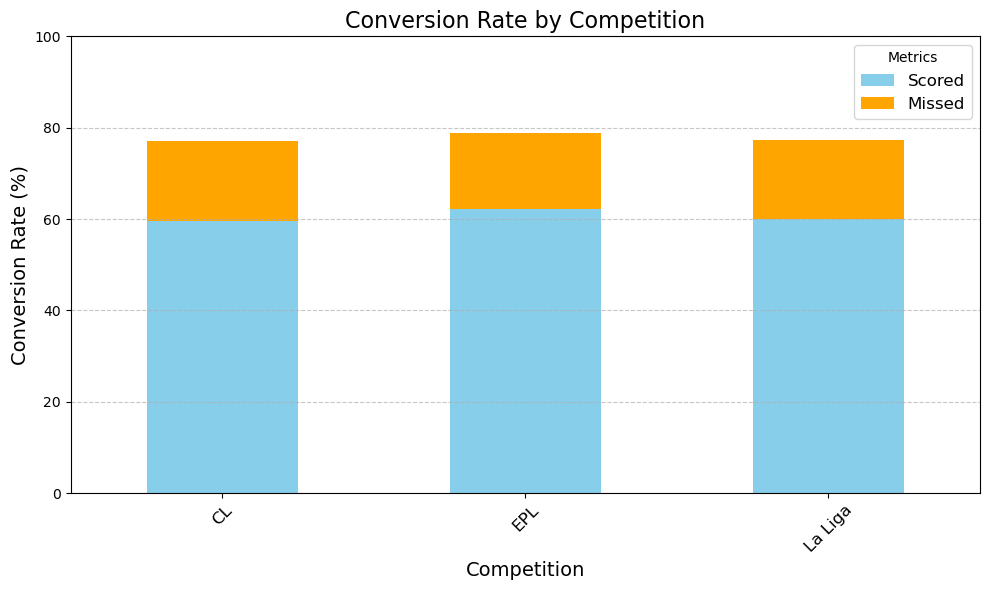

In [22]:
# Group by 'Comp' and calculate sums
grouped = df.groupby('Comp')[['PKatt', 'PK', 'PKm']].sum()

# Calculate the conversion rate
grouped['conversion_rate'] = (grouped['PK'] / grouped['PKatt']) * 100

# Normalize the counts so their stacked heights represent the conversion rate
grouped['Scored'] = (grouped['PK'] / grouped['PKatt']) * grouped['conversion_rate']
grouped['Missed'] = (grouped['PKm'] / grouped['PKatt']) * grouped['conversion_rate']

# Plot the stacked bar chart
grouped[['Scored', 'Missed']].plot(
    kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange', 'green']
)

# Add labels and title
plt.title('Conversion Rate by Competition', fontsize=16)
plt.xlabel('Competition', fontsize=14)
plt.ylabel('Conversion Rate (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Metrics', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set the y-axis scale
plt.ylim(0, 100)

# Show the plot
plt.tight_layout()
plt.show()